In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, classification_report
from skimage.transform import resize

2024-06-09 05:45:18.058513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 05:45:18.058655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 05:45:18.324416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
class_names_mnist = [str(i) for i in range(10)]

# Preprocess MNIST data
x_train_mnist = np.expand_dims(x_train_mnist.astype('float32') / 255.0, -1)
x_test_mnist = np.expand_dims(x_test_mnist.astype('float32') / 255.0, -1)
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Load CIFAR-10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess CIFAR-10 data
x_train_cifar10 = x_train_cifar10.astype('float32') / 255.0
x_test_cifar10 = x_test_cifar10.astype('float32') / 255.0
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Data augmentation for CIFAR-10
datagen_cifar10 = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen_cifar10.fit(x_train_cifar10)

In [12]:
# Define LeNet-5 model
def create_lenet5(input_shape, num_classes):
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Resize MNIST images to 32x32 pixels
x_train_mnist_resized = np.array([resize(image, (32, 32)) for image in x_train_mnist])
x_test_mnist_resized = np.array([resize(image, (32, 32)) for image in x_test_mnist])

# Train and evaluate LeNet-5 on resized MNIST
lenet5_mnist = create_lenet5(x_train_mnist_resized.shape[1:], 10)
history_mnist_lenet5 = lenet5_mnist.fit(x_train_mnist_resized, y_train_mnist, epochs=10, validation_data=(x_test_mnist_resized, y_test_mnist))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8989 - loss: 0.3373 - val_accuracy: 0.9810 - val_loss: 0.0609
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0548 - val_accuracy: 0.9878 - val_loss: 0.0404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0370 - val_accuracy: 0.9865 - val_loss: 0.0429
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9871 - val_loss: 0.0404
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9870 - val_loss: 0.0420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9875 - val_loss: 0.0420
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9888 - val_loss: 0.0402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0102 - 

In [14]:
# Train and evaluate LeNet-5 on CIFAR-10
lenet5_cifar10 = create_lenet5(x_train_cifar10.shape[1:], 10)
history_cifar10_lenet5 = lenet5_cifar10.fit(datagen_cifar10.flow(x_train_cifar10, y_train_cifar10, batch_size=64),
                                            epochs=10,
                                            validation_data=(x_test_cifar10, y_test_cifar10),
                                            steps_per_epoch=x_train_cifar10.shape[0] // 64)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.3470 - loss: 1.7916 - val_accuracy: 0.4807 - val_loss: 1.4496
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5156 - loss: 1.5082

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.5156 - loss: 1.5082 - val_accuracy: 0.4781 - val_loss: 1.4565
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4777 - loss: 1.4580 - val_accuracy: 0.5220 - val_loss: 1.3150
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.4844 - loss: 1.4857 - val_accuracy: 0.5254 - val_loss: 1.3098
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5157 - loss: 1.3594 - val_accuracy: 0.5599 - val_loss: 1.2381
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.5312 - loss: 1.3634 - val_accuracy: 0.5542 - val_loss: 1.2496
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5413 - loss: 1.2933 - val_accuracy: 0.5784 - val_loss: 1.1853
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.6562 - loss: 1.1072 - val_accuracy: 0.5790 - val_loss: 1.1819
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5552 - loss: 1.2482 - val_accurac

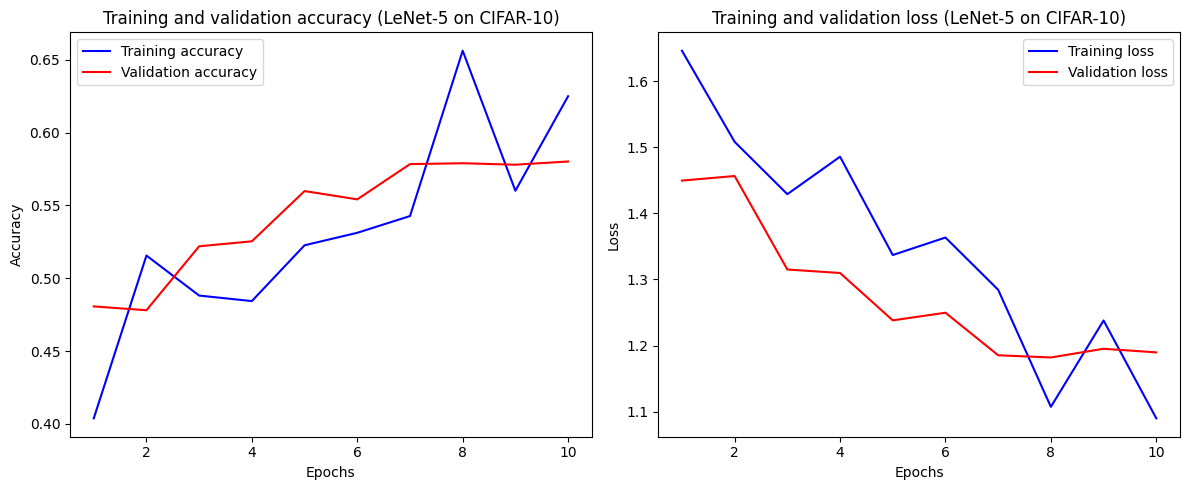

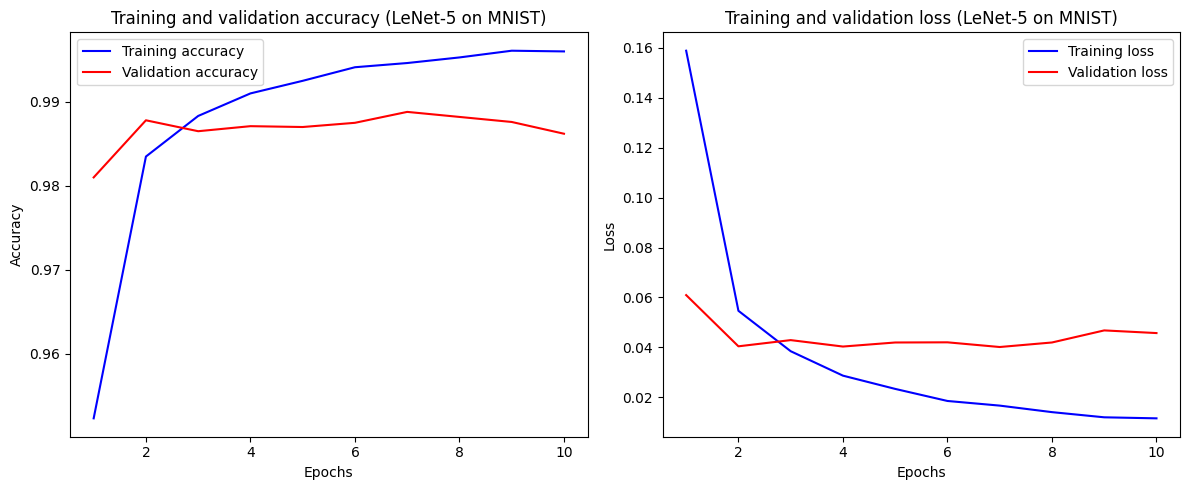

In [15]:
# Plot training history
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_cifar10_lenet5, 'LeNet-5 on CIFAR-10')
plot_training_history(history_mnist_lenet5, 'LeNet-5 on MNIST')

In [16]:
# Evaluate the LeNet-5 model on CIFAR-10 test data
y_pred_cifar10_lenet5 = np.argmax(lenet5_cifar10.predict(x_test_cifar10), axis=-1)
y_true_cifar10_lenet5 = np.argmax(y_test_cifar10, axis=-1)
accuracy_cifar10_lenet5 = accuracy_score(y_true_cifar10_lenet5, y_pred_cifar10_lenet5)
precision_cifar10_lenet5 = precision_score(y_true_cifar10_lenet5, y_pred_cifar10_lenet5, average='weighted')

print("\nLeNet-5 Model Evaluation on CIFAR-10:")
print(f"Accuracy: {accuracy_cifar10_lenet5:.10f}")
print(f"Precision: {precision_cifar10_lenet5:.10f}")
print(classification_report(y_true_cifar10_lenet5, y_pred_cifar10_lenet5, target_names=class_names_cifar10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

LeNet-5 Model Evaluation on CIFAR-10:
Accuracy: 0.5802000000
Precision: 0.5827235484
              precision    recall  f1-score   support

    airplane       0.71      0.58      0.64      1000
  automobile       0.57      0.83      0.68      1000
        bird       0.51      0.41      0.45      1000
         cat       0.49      0.25      0.34      1000
        deer       0.65      0.37      0.48      1000
         dog       0.50      0.51      0.51      1000
        frog       0.55      0.76      0.64      1000
       horse       0.57      0.73      0.64      1000
        ship       0.72      0.70      0.71      1000
       truck       0.55      0.65      0.60      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



In [17]:
# Evaluate the LeNet-5 model on resized MNIST test data
y_pred_mnist_lenet5 = np.argmax(lenet5_mnist.predict(x_test_mnist_resized), axis=-1)
y_true_mnist_lenet5 = np.argmax(y_test_mnist, axis=-1)
accuracy_mnist_lenet5 = accuracy_score(y_true_mnist_lenet5, y_pred_mnist_lenet5)
precision_mnist_lenet5 = precision_score(y_true_mnist_lenet5, y_pred_mnist_lenet5, average='weighted')

print("\nLeNet-5 Model Evaluation on MNIST:")
print(f"Accuracy: {accuracy_mnist_lenet5:.10f}")
print(f"Precision: {precision_mnist_lenet5:.10f}")
print(classification_report(y_true_mnist_lenet5, y_pred_mnist_lenet5, target_names=class_names_mnist))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

LeNet-5 Model Evaluation on MNIST:
Accuracy: 0.9862000000
Precision: 0.9862803962
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

